# Experiment 8: Operational Amplifiers

Name: Mufaro Machaya

Date: October 31, 2025

Partner's Name: Omar Hui

In [1]:
from common import *

> **Objective**
>
> Operational amplifiers (Op-Amps) are versatile devices used in a wide variety of applications. Some
of the basic properties of Op-Amps will be studied in this lab, with an emphasis on the most common
application: a voltage amplifier with negative feedback.

> **Learning Goals**
> 
> After this lab you will be able to:
> - characterize the linearity of an Op-Amp circuit
> - recognize the influence of amplifier distortion/clipping
> - be familiar with the behaviour and limitations of circuits using Op-Amps
> - build circuits with more complex components
> - begin to troubleshoot circuits with Op-Amps

## 1. Building an Inverting Voltage Amplifier

> Construct the circuit shown in Fig. 3. **Important: do not power up the protoboard until you have
checked all connections twice! Make sure you and your partner agree that it is set up correctly!**

I need to build the following circuit:

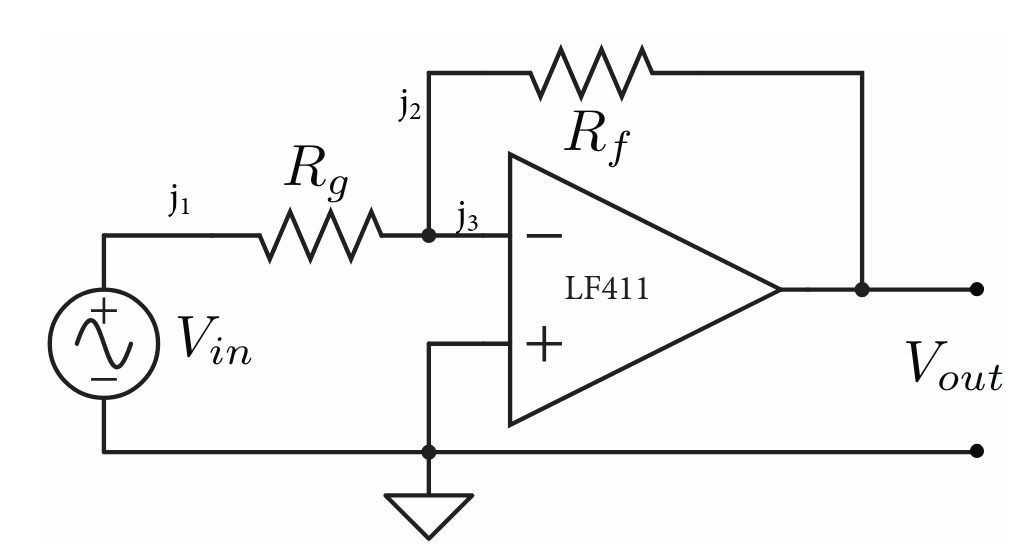

Before the lab, I built this circuit in TinkerCAD as the following:

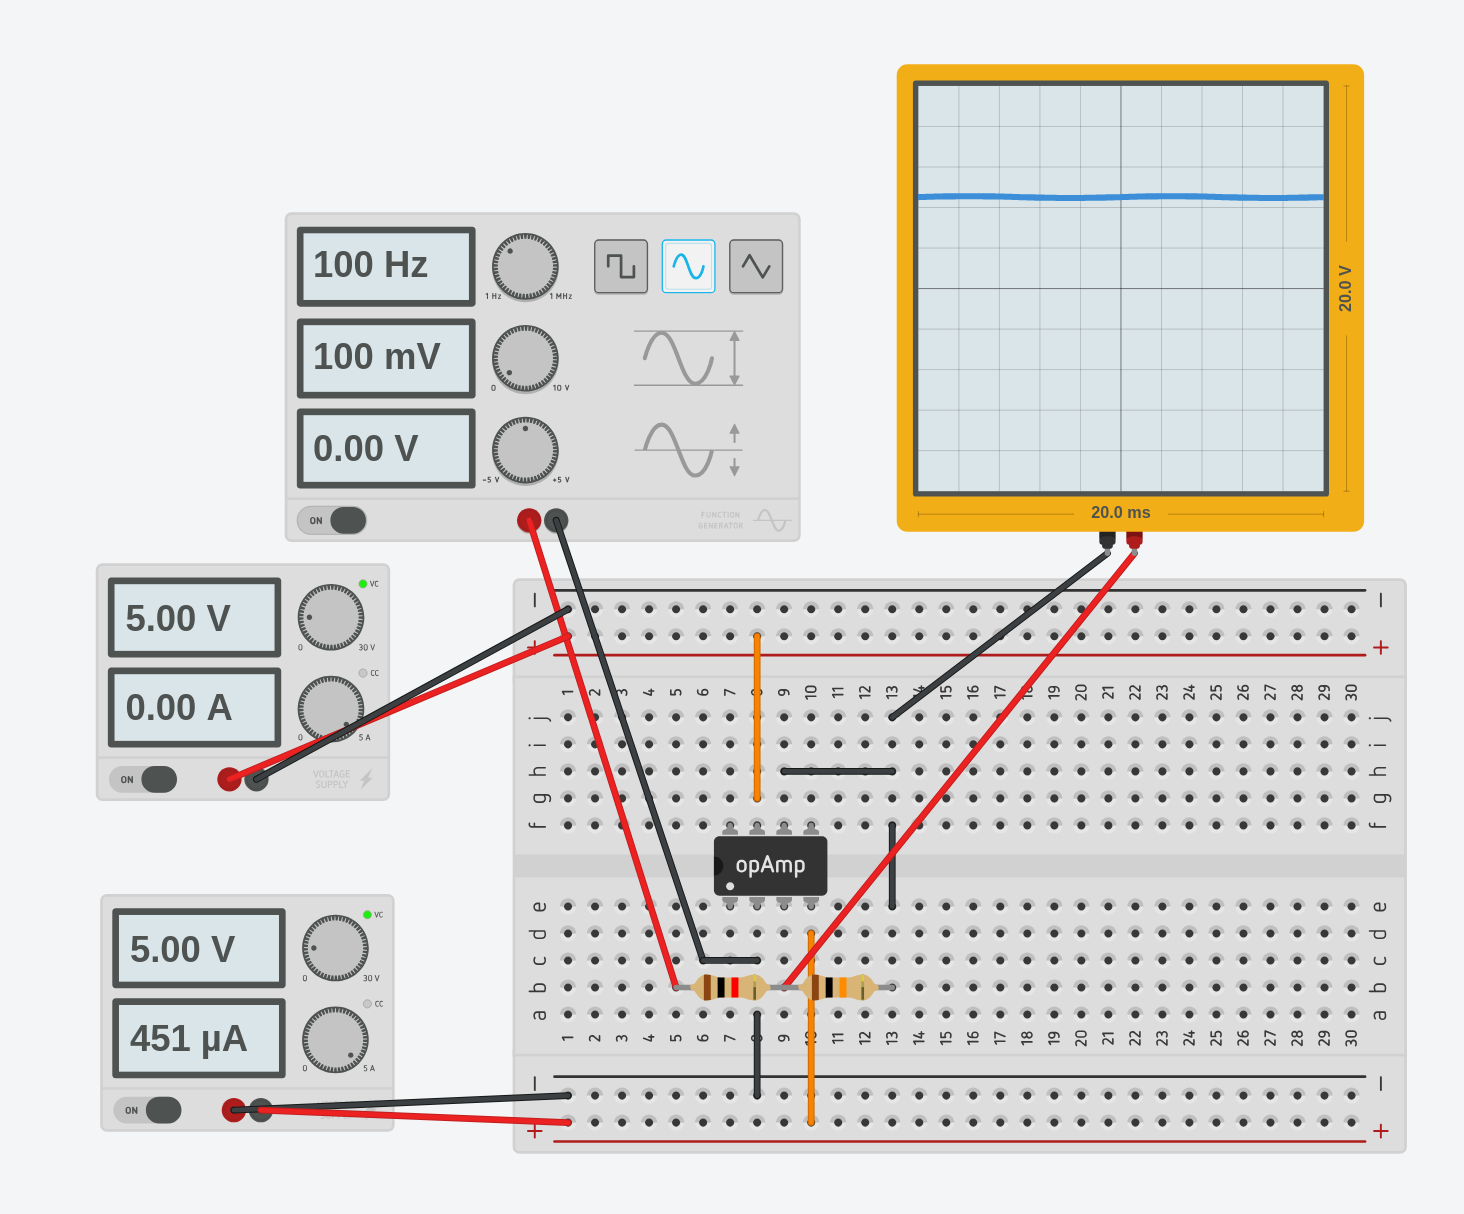

**Notes:** This circuit actually has a few issues:
1. The resistors are connected to the wrong pin, should be pin 2 not pin 3!
2. Oscilloscope positive and ground are inverted, and ground should be connected directly to ground.
3. Oscilloscope and function generator should both just be connected to ground.

The resistors are $R_{g}=0.991 \pm 0.008$ $k\Omega$ and $R_{f} = 9.89 \pm 0.08$ $k\Omega$, with the following uncertainty functions (from Experiment 7):

>This lab requires the measurement of $10$ $k\Omega$ and $1$ $k\Omega$ resistors, which have an uncertainty function of
$$u[R](R)_{0.001} = R \times 0.5\% + 3 \times 0.001$$
for $1$ $k\Omega$ and
$$u[R](R)_{0.01} = R \times 0.5\% + 3 \times 0.01$$
respectively.

In [2]:
def record_resistance(resistance: np.float64, precision: int):
    resistance_uncert = resistance * 0.5/100 + 3 * 10 ** (-precision)
    print(f'R = {resistance:.3f} +/- {resistance_uncert:.3f} k Ohm')
    return resistance * 1e3, resistance_uncert * 1e3

In [3]:
resistance_10k, resistance_uncert_10k = record_resistance(9.89, 2)
resistance_1k,  resistance_uncert_1k  = record_resistance(0.991, 3)

R = 9.890 +/- 0.079 k Ohm
R = 0.991 +/- 0.008 k Ohm


**Predicted Gain**

We can predict the gain of the circuit based on the formula

$$\beta = -\frac{R_{f}}{R_{g}}$$

and 

$$u[\beta] = \beta \sqrt{ \left( \frac{u[R_{f}]}{R_f} \right)^2 + \left( \frac{u[R_g]}{R_g} \right)^2 }$$

In [4]:
beta = resistance_10k / resistance_1k
beta_uncert = beta * np.sqrt( ( resistance_uncert_10k / resistance_10k ) ** 2 +
                              ( resistance_uncert_1k / resistance_1k ) ** 2 )
print(f'Predicted gain: {beta:.3f} +/- {beta_uncert:.3f}')

Predicted gain: 9.980 +/- 0.113


So the predicted gain for the amplifier is $\beta = 9.98 \pm 0.11$.

> What do you notice about the amplitude and phase of the output signal relative to the input signal? Explain what you observe.

The phase and amplitude are exactly the same if the power supply is off, but if the power supply is on, the output amplitude is about 10 times larger than the input amplitude and a $\pi$ phase with the same frequency.

> Save the
screenshots of the input and output signals with power supply off and then with the power supply
on. Take a photo of your circuit to include in your notes.

**Power Supply Off**

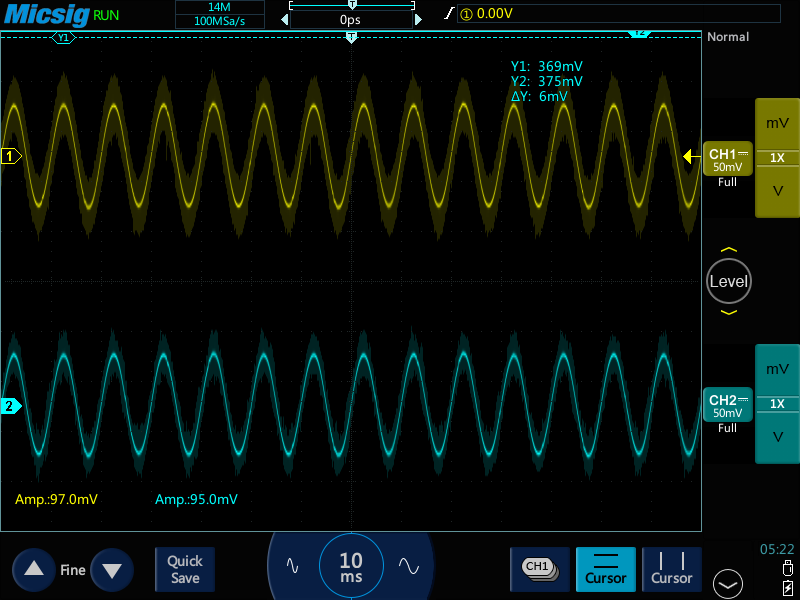

**Observation** When the power supply is off, the input signal and the output signal are exactly the same in both phase, frequency, and amplitude.

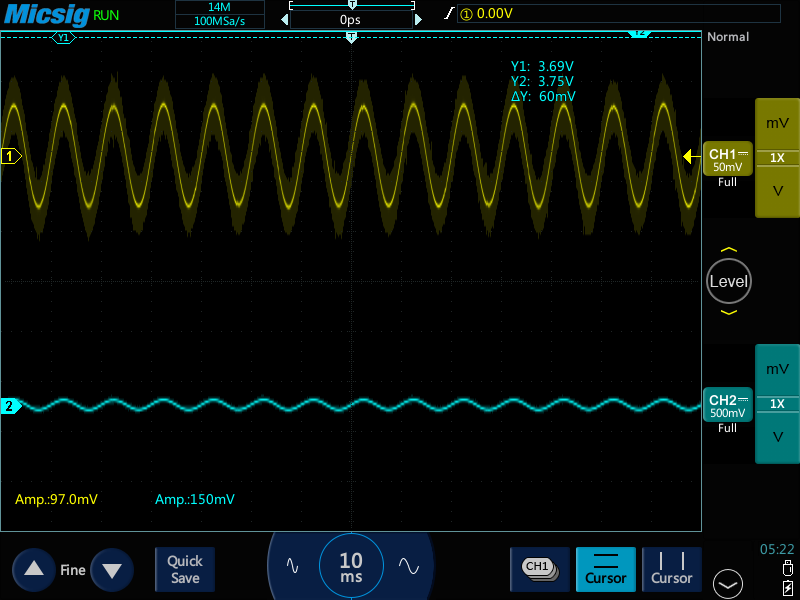

This is the same screenshot with a 500 mV scale, for comparison with the next case:

**Power Supply On**

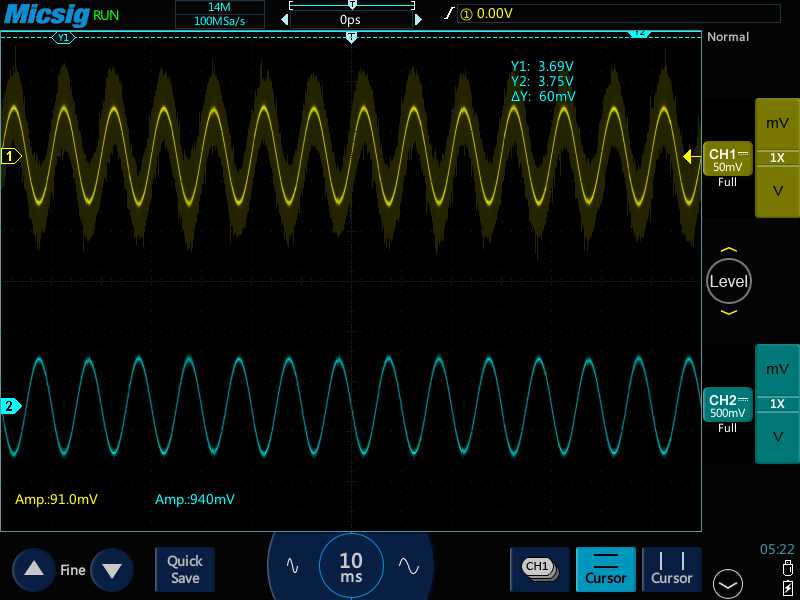

**Observations:** With the power supply on, the output signal has $10 \times$ the amplitude of the input signal and a phase of $\pi$, or, alternatively, this means that there is a $-10 \times$ amplitude and no phase.

> **Checkpoint 1:** Show your circuit along with the input and output signals displayed on CH1 and CH2 of the oscilloscope. While waiting, you can carry on with the measurements below unless you believe there is
a problem.

## 2. Amplifier Measurements

### 2.1 Distortion and Clipping

> Start with a small amplitude low frequency sine wave input signal (e.g. 100 mV and 100Hz
you started with) with no offset. Vary the offset voltage and amplitude of the signal and report
under what conditions there is distortion of the output signal (deviation from sinusoidal).

For amplitude, the clipping on the bottom of the wave begins around 0.8 volts and clipping for the top begins around 1 volt (for 0 offset), and higher amplitudes clip simultaneously. With an amplitude of 500 mV, clipping occurs for the top of the wave beginning around -300 mV and occurs for the bottom of the wave around 200 mV, but clipping for the top and bottom of the wave do not occur simultaneously. This means that there is a distinct range of voltages that can be output by the second signal.

> Save a few screenshots to supplement your description.

### Amplitude Clipping (No Offset)

**0.8 Volts**

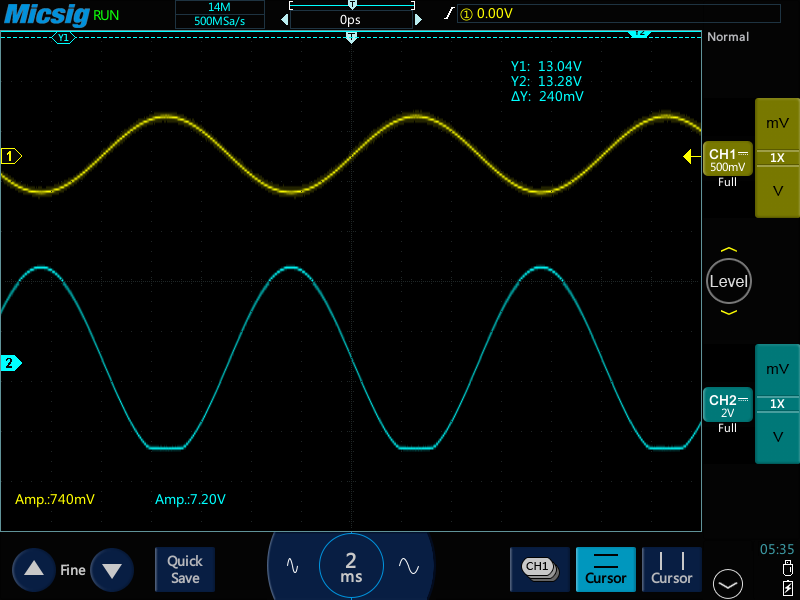

**Observations:** Around 0.8 Volt amplitude, the bottom of the wave begins to clip (but not the top).

**1 Volt**

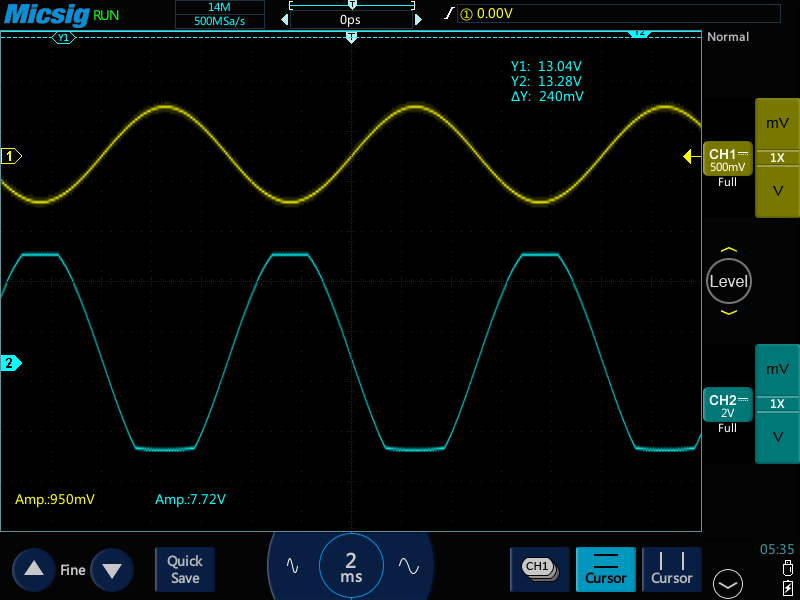

**Observations:** At 1 V amplitude, the top of the wave clips. There isn't a specific point at which only the top clips, though.

### Offset Clipping (Amplitude of 500 mV)

**100 mV Offset**

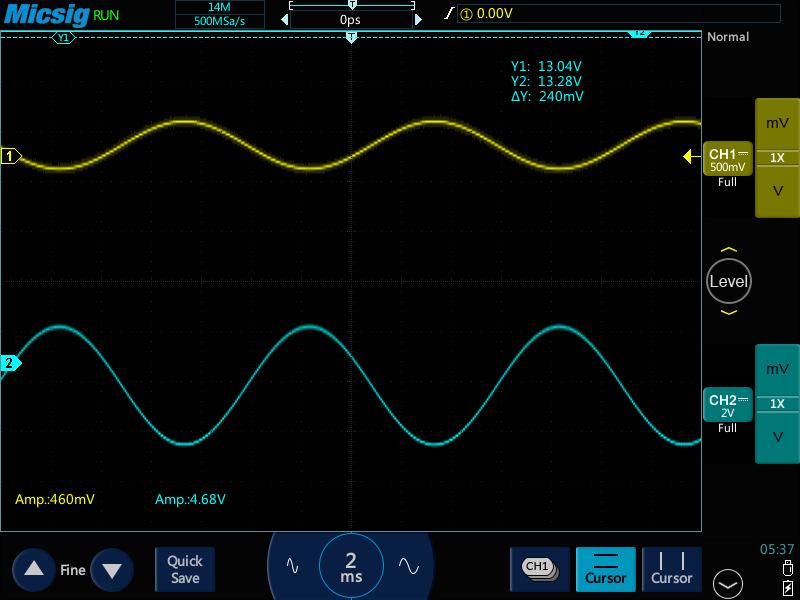

**Observations:** The wave is completely unclipped at 100 mV offset.

**200 mV Offset**

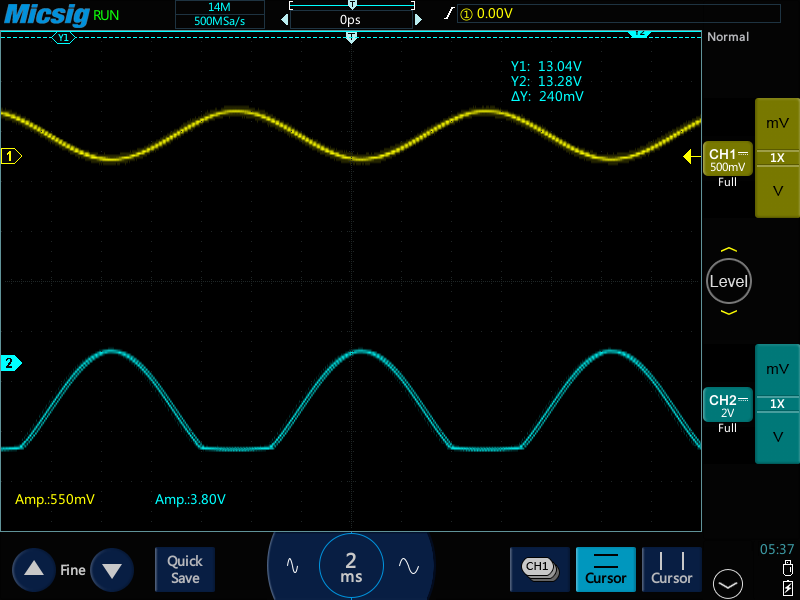

**Observations:** At 200 mV the bottom of the wave begins to clip (going at around 50 mV intervals). 

**-300 mV Offset**

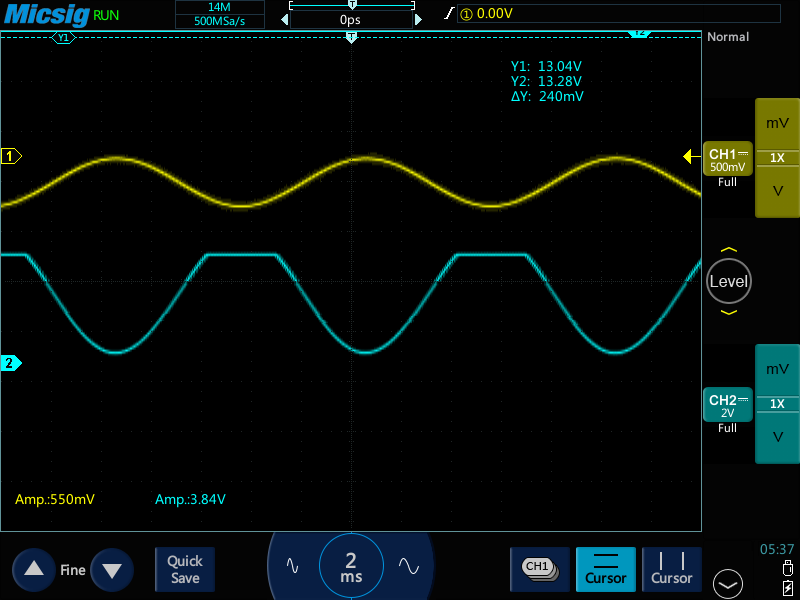

**Observations:** At -300 mV offset, the top of the wave begins to clip.

> Describe the nature of the distortion that is observed when the output signal reaches a some limiting
value for both positive and negative voltages.

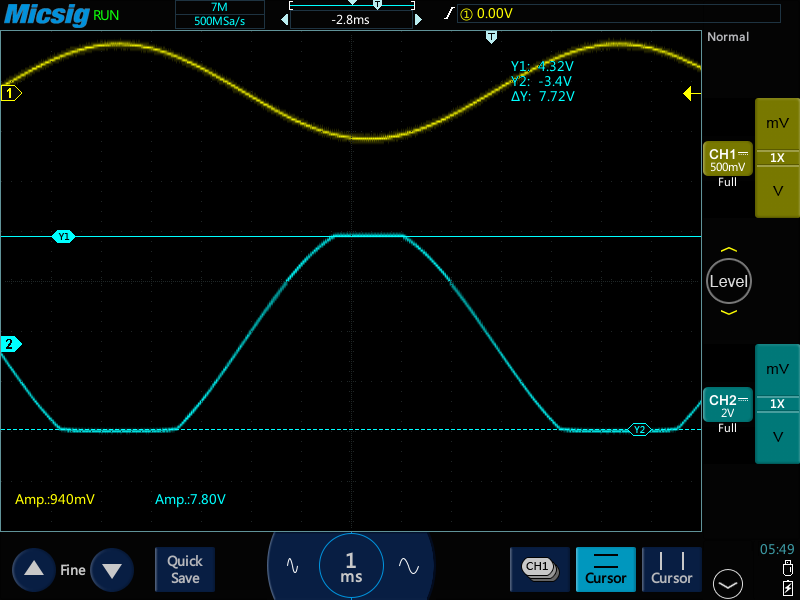

The wave has two distinct limiting values on the positive and negative regions, and essentially, this clipping works just like a mathematical clip function: voltages produced that are above the maximum clip (which is about 4.32 volts) is clipped to the maximum and voltages that are below the minimum (about -3.4 volts) are clipped to the minimum voltage.

> Save images of both channels with and without
distortion. Report the limiting values for your Op-Amp 

Assuming standard instrumental uncertainty ($\delta V = \frac{0.01 \text{ V}}{2 \sqrt{3}}$), the limiting values are $V_{max} = 4.32 \pm \delta V$ volts and $V_{min} = -3.4 \pm \delta V$ volts.

> For the measurements below always check
for such distortions. Make a note of any such checks you do in your notebook.

> Make sure you include a detailed sketch of the
circuit as well as a photo showing all the connections.

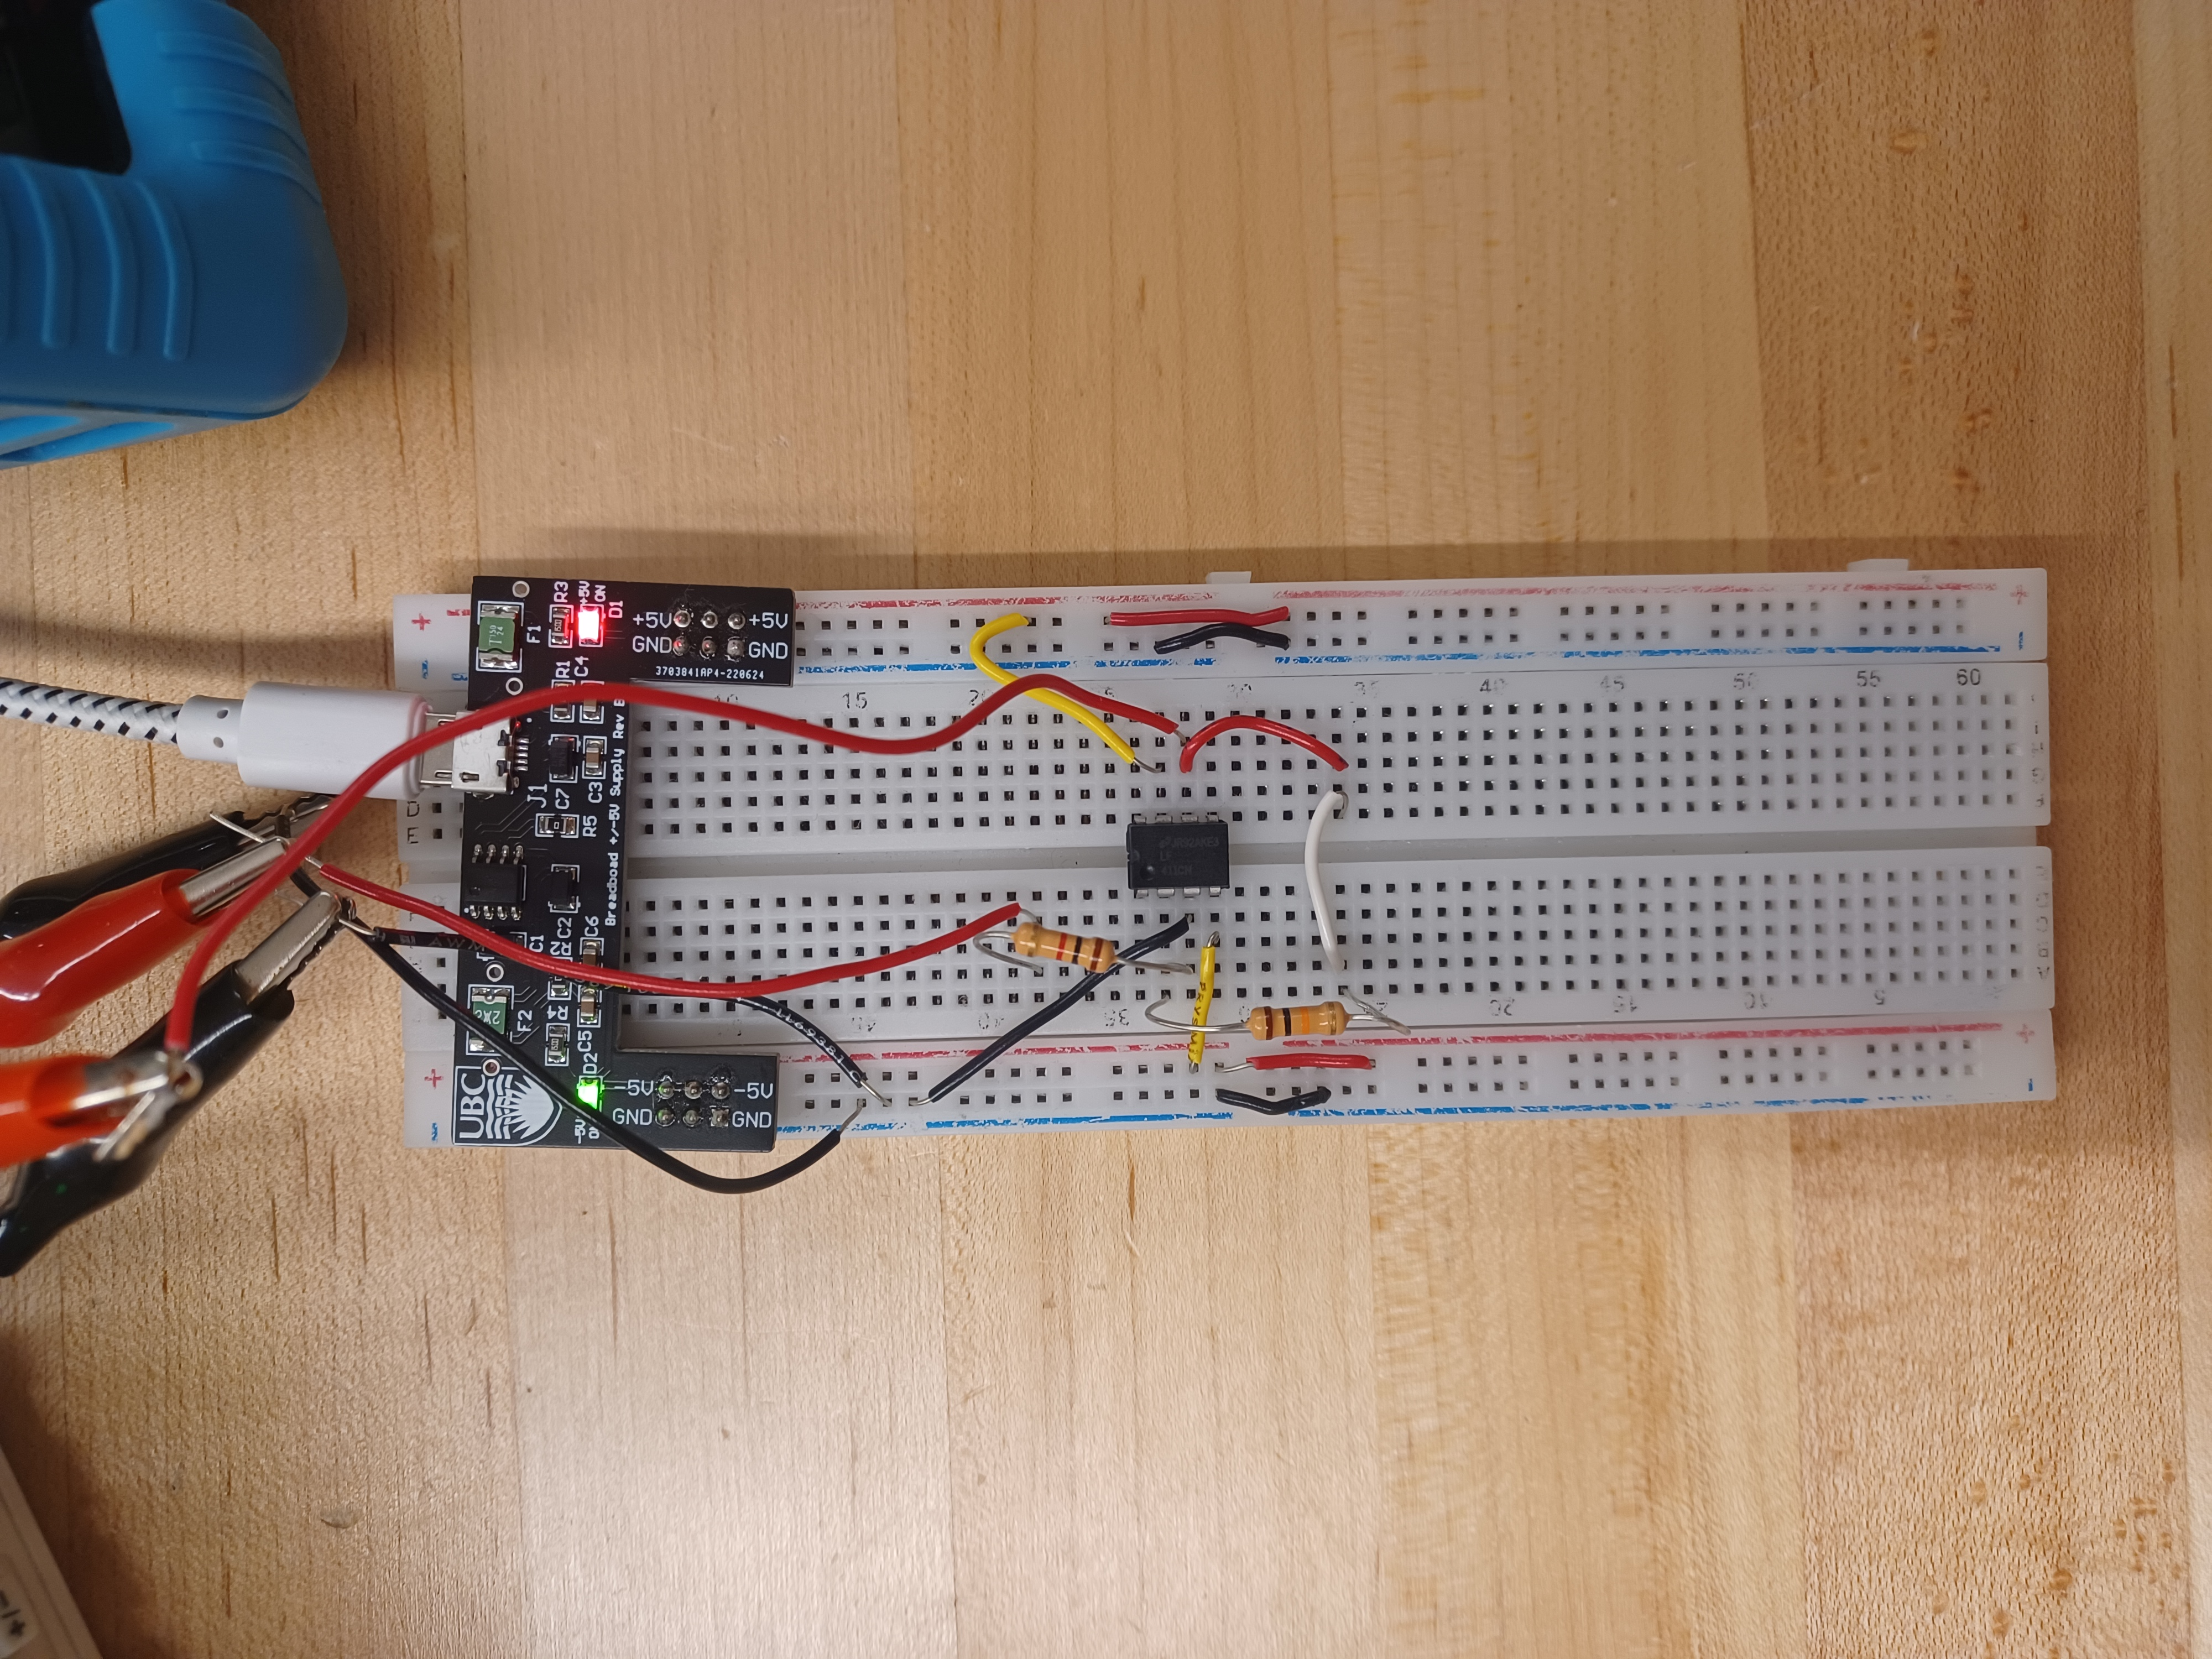

> **Checkpoint 2:** Discuss your observations of the distortion and clipping of your amplifier.

### 2.2 Linearity and Gain

> Measure the linearity of the amplifier gain under conditions
where there is minimal distortion, but take a couple of points
where you see some small amount of distortion.

> Make measurements of the amplitude $V_{out}$ versus $V_{in}$ at $100$ $Hz$. A plot
of this allows you to check the range over which this is linear,
meaning the gain (which is the slope) is constant. Ensure you
have enough data to do a good linear fit plus a few points that
may be beyond the linear range.

We'll just measure from 100 mV up by 50 mV (on the wave generator) until we observe clipping. We'll be reading directly off of the oscilloscope.

In [5]:
vin1  = np.array([88,   136,  180,  232,  280,  316,  368,  416,  460,  490,  530,  590,  660,  700,  740  ]) / 1000
vout1 = np.array([0.87, 1.40, 1.83, 2.32, 2.81, 3.28, 3.72, 4.20, 4.62, 5.12, 5.54, 6.04, 6.56, 6.86, 7.14 ])

**Note:** The last two points showed obvious clipping, and I'll keep them just to observe the deviation from linearity. 

Reading amplitude off of the oscilloscope, we can assume that both have standard instrumental uncertainty:
$$u[V] = (2\sqrt{3})^{-1} \times 10^{-n}$$
where $n$ is the precision ($n = 2 \to 0.01$, $n = 3 \to 0.001$)

In [6]:
def instrumental_uncertainty(data, precision=0):
    return np.full_like(data, (10 ** -precision) / (2 * np.sqrt(3)))

uvin1  = instrumental_uncertainty(vin1,  0) / 1000
uvout1 = instrumental_uncertainty(vout1, 2)

In [7]:
dataset_1 = Dataset(
    x  = vin1,
    dx = uvin1,
    y  = vout1,
    dy = uvout1
)

In [8]:
gopts = GraphingOptions(
    x_label = 'Input Voltage',
    y_label = 'Output Voltage',
    x_units = 'V',
    y_units = 'V'
)

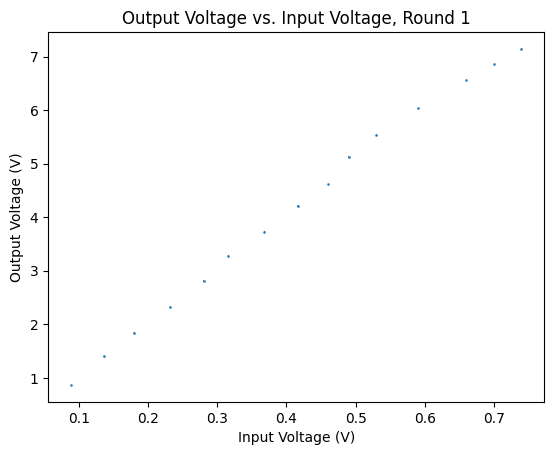

In [9]:
plot_dataset(dataset_1, gopts)

> **Checkpoint 3:** Show the data you have obtained to determine the gain and linearity, and discuss how you will
analyze the data.

I'm just assuming there is no offset and using a one-parameter linear model with $\beta$ as the only parameter.

In [10]:
model_1 = LinearModel(slope=beta)
results_1 = autofit(dataset_1, model_1, gopts)
print_results(model_1, results_1)

+---------------+---------+---------------+
| Measurement   |   Value |   Uncertainty |
+===============+=========+===============+
| Slope         |   10.03 |      0.001626 |
+---------------+---------+---------------+
Chi^2 = 1992.114


(Post-Lab) **Observations:** The model obtained a gain of $\beta = 10.030 \pm 0.001$, which is almost exactly the prediction. The $\chi^2$ is extremely high, however, which suggests a poor fit, but this may also be due to underestimated residuals as the uncertainty in $\beta$ is extremely low (so the fit is extremely certain about this parameter).

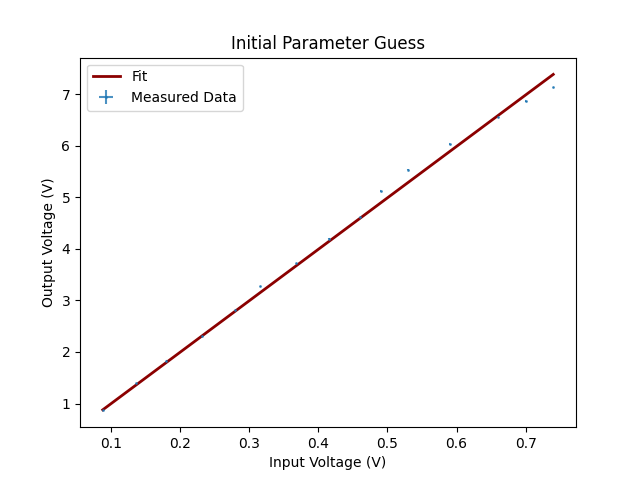

In [11]:
display(results_1.initial_guess_graph)

(Post-Lab) **Observations:** As expected, the initial guess is actually fairly good for the data, completely bisecting it.

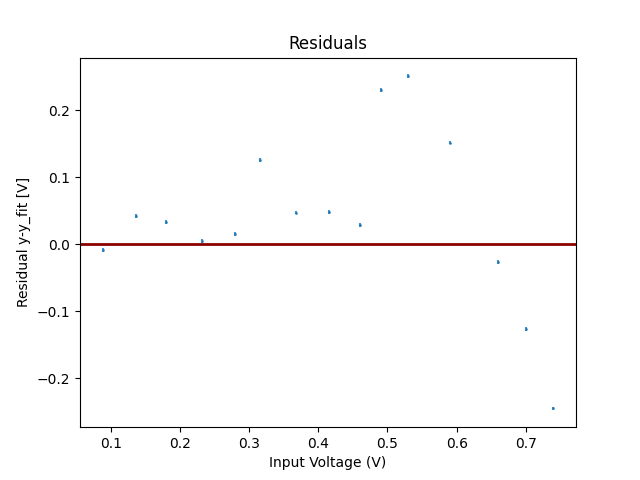

In [12]:
display(results_1.initial_guess_residuals_graph)

(Post-Lab) **Observations:** The initial guess might be a really good fit as there is no pattern to the residuals. We can also observe that the uncertainties in each datapoint are extremely low (so my uncertainty measurements are undoubtedly underestimated). This may make the autofit result untrustworthy, however.

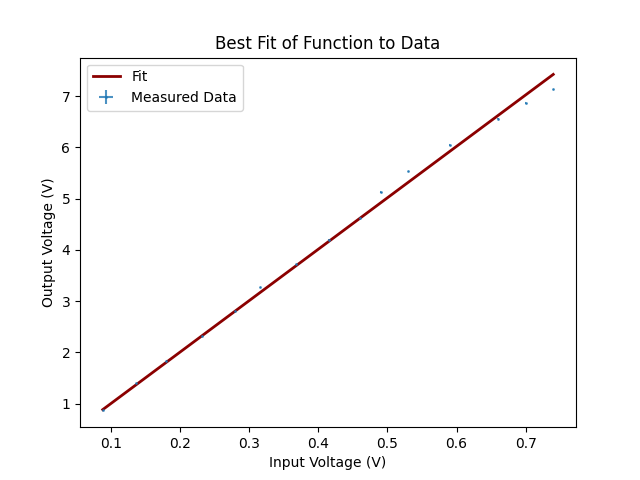

In [13]:
display(results_1.autofit_graph)

(Post-Lab) **Observations:** The autofit result seems somewhat successful, also bisecting the data.

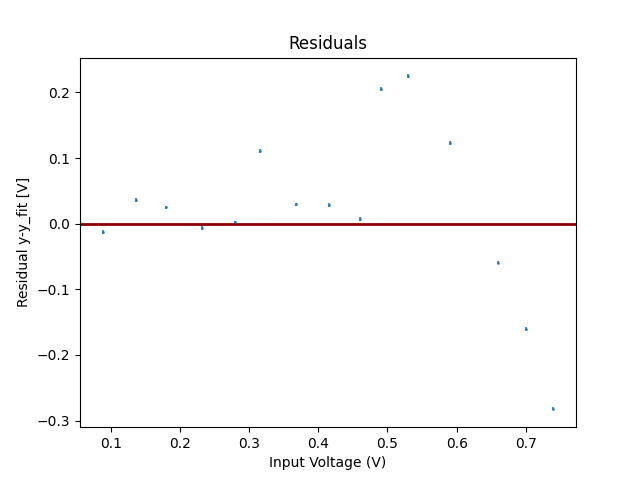

In [14]:
display(results_1.autofit_residuals_graph)

(Post-Lab) **Observations:** Similarly to the initial guess, the autofit bisects the data without a trend. So, we can trust the result of the autofit to be a correct $\beta$, and the high error predicted by $\chi^2$ can be explained by the uncertainties being far underestimated. This is likely due to a mistake in choosing standard instrumental uncertainty. What would have been a much better method to measure this would have been using the measurement bars.

> Repeat these measurements at high frequency e.g. 500kHz. Describe and explain any differences
between the low and high frequency data sets.

Here, we're going to start from 100 mVpp and go up by 50 mV each time in much the same way. I have to split the data into segments as the measurement units change each time on the oscilloscope.

Both are in mV.

In [15]:
vin2_1  = np.array([97,  147]) / 1000
vout2_1 = np.array([512, 784]) / 1000

In [16]:
uvin2_1  = instrumental_uncertainty(vin2_1, 2) / 1000
uvout2_1 = instrumental_uncertainty(vout2_1, 2) / 1000

$V_{out}$ is measured in V:

In [17]:
vin2_2 = np.array([197,  248,  297,  343,  394,  443,  490,  540,  592,  644,  690,  740,  792,  840,  890,  936,  988]) / 1000
vout2_2  = np.array([1.06, 1.29, 1.56, 1.84, 2.09, 2.36, 2.62, 2.85, 3.11, 3.37, 3.64, 3.88, 4.13, 4.41, 4.67, 4.86, 5.08])

In [18]:
uvin2_2  = instrumental_uncertainty(vin2_2, 0) / 1000
uvout2_2 = instrumental_uncertainty(vout2_2, 2)

$V_{in}$ is now measured in V:

In [19]:
vin2_3 = np.array([1.04, 1.09, 1.14, 1.18, 1.24, 1.29, 1.34, 1.39, 1.43, 1.48])
vout2_3  = np.array([5.34, 5.60, 5.80, 6.02, 6.22, 6.48, 6.72, 6.86, 6.98, 7.14])

In [20]:
uvin2_3  = instrumental_uncertainty(vin2_3, 2)
uvout2_3 = instrumental_uncertainty(vout2_3, 2)

In [21]:
dataset_2 = Dataset(
    x  = np.concatenate((vin2_1,   vin2_2,   vin2_3)),
    dx = np.concatenate((uvin2_1,  uvin2_2,  uvin2_3)),
    y  = np.concatenate((vout2_1,  vout2_2,  vout2_3)),
    dy = np.concatenate((uvout2_1, uvout2_2, uvout2_3))
)

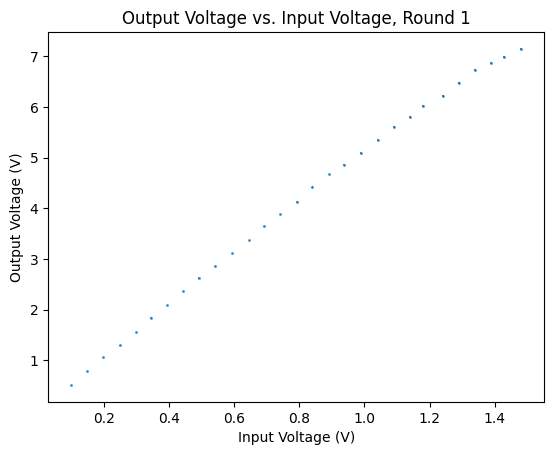

In [22]:
plot_dataset(dataset_2, gopts)

(Post-Lab) **Observations:** Once more, the uncertainties seem underestimated for the same reasons as before. For a future experiment, I will probably want to manually measure or assume Gaussian distribution to use a 95% confidence interval.

We can plot the data around $V_{in}=1.38$ volts:

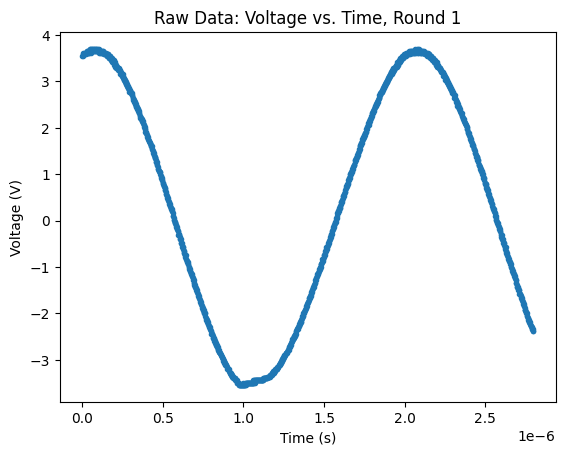

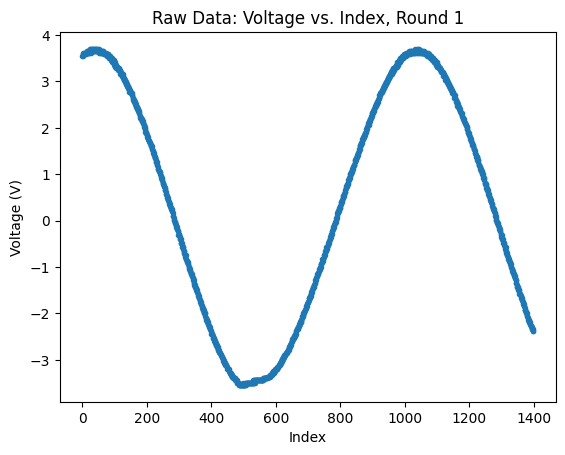

In [23]:
raw = load_raw_data('data/bad.csv', plot=True, graphing_options=VOLTAGE_VERSUS_TIME_GRAPH_OPTIONS)

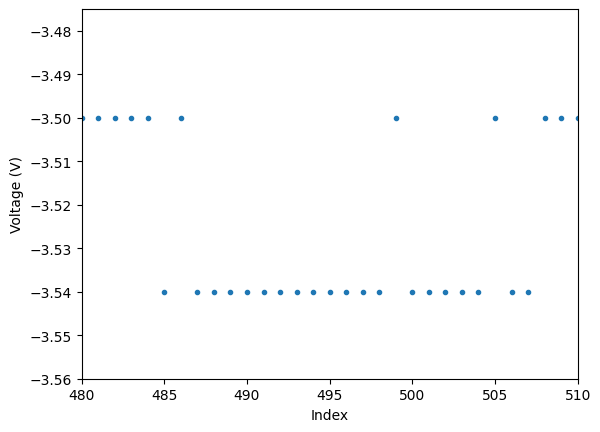

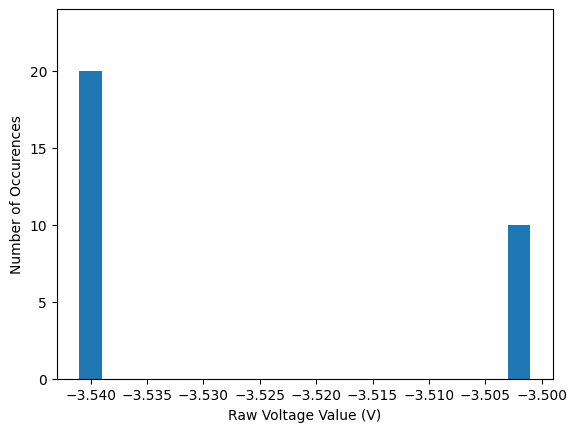

Mean =  -3.5266666666666677 0.018856180831641284
Standard Deviation (Noise Value) =  0.018856180831641284


In [24]:
std_dev = calculate_uncertainty(
    raw[0], method="default",
    indices_range=(480,510), 
    y_range=(-3.56,-3.475),
    plot=True,
    graphing_options=VOLTAGE_VERSUS_TIME_GRAPH_OPTIONS
)

(Post-Lab) **Note:** Due to the low amount of data, I'll be using a low packing factor of 10.

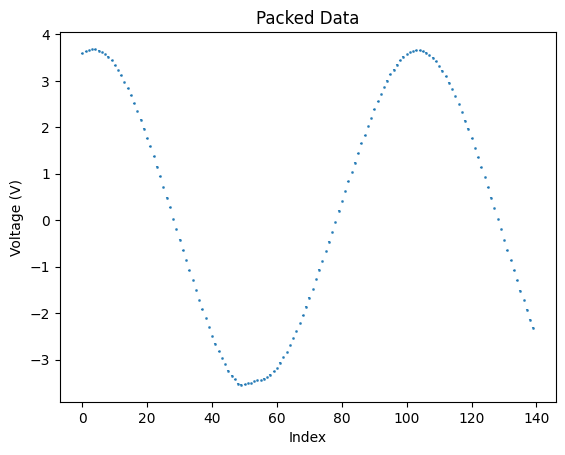

In [25]:
packed_data = pack_data(
    raw[0], 
    std_dev, p=10, 
    plot=True, graphing_options=VOLTAGE_VERSUS_TIME_GRAPH_OPTIONS
)

(Post-Lab) **Note:** I can try fitting a sine wave to this to see if there's distortion (and, if so, by how much). I'll use an amplitude of about 3.5 V from looking at the graph, a frequency of 500 kHz from the wave generator, and a phase of $\pi/2$ due to the amplifier inverting the voltage.

In [26]:
model=SineModel(amplitude=3.5, frequency=5e5, phase=np.pi/2)
results = autofit(packed_data, model, VOLTAGE_VERSUS_TIME_GRAPH_OPTIONS)
print_results(model, results)

+---------------+------------+---------------+
| Measurement   |      Value |   Uncertainty |
+===============+============+===============+
| Amplitude     |      3.606 |     0.0007284 |
+---------------+------------+---------------+
| Frequency     | 499900     |    38.31      |
+---------------+------------+---------------+
| Phase         |      1.348 |     0.0004151 |
+---------------+------------+---------------+
Chi^2 = 101.745


This fit gives each of the parameters (roughly) back, so my expectations match the results, yet the $\chi^2$ doesn't seem to perfectly match the data. We can see as to why, as this could be due to either distortion, underestimated uncertainty, or both.

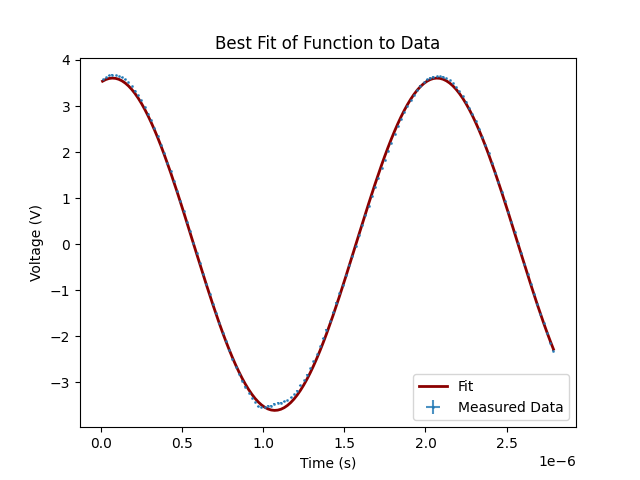

In [27]:
display(results.autofit_graph)

(Post-Lab) **Observations:** The autofit seems to match the graph well for most of the graph except for the trough, where we can observe a bit of distortion. We can probably see just how bad this really is from the residuals graph.

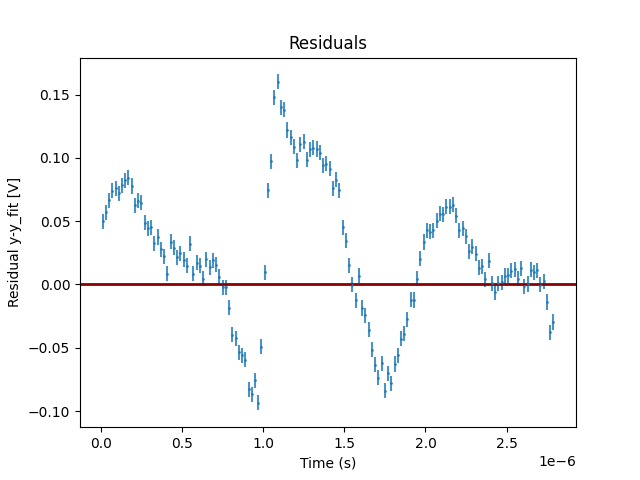

In [28]:
display(results.autofit_residuals_graph)

(Post-Lab) **Observations:** The residuals for points even without distortion seem to be with a somewhat sinusoidal trend and with underestimated uncertainties, so the uncertainty is probably underestimated, but regardless, the flat region observed for the point assumed to be distortion confirms that this is probably the limit of our distortion, so we can safely exclude values at/above 1.38 volts from consideration (the last three points).

In [29]:
shear_dataset(dataset_2, 3)

In [35]:
model_2 = LinearModel(slope=beta)
results_2 = autofit(dataset_2, model_2, gopts)
print_results(model_2, results_2)

+---------------+---------+---------------+
| Measurement   |   Value |   Uncertainty |
+===============+=========+===============+
| Slope         |   5.317 |     1.639e-05 |
+---------------+---------+---------------+
Chi^2 = 98568.341


(Post-Lab) **Observations:** The model calculates a gain of $\beta = 5.317 \pm 0.00001$, so it's an incredibly certain calculation (as before), but it obtains an extremely high $\chi^2 = 98568$, which indicates that the model completely does not fit the data. This is likely, however, again due to the residuals being underestimated.

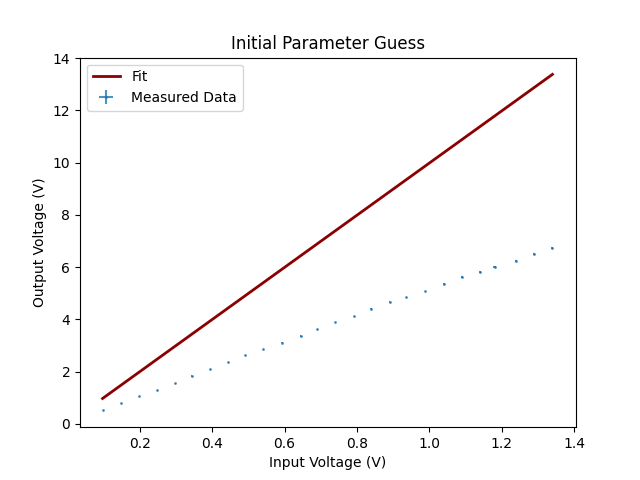

In [36]:
display(results_2.initial_guess_graph)

(Post-Lab) **Observations:** In this case, we can see that our expectation of $\beta \approx 10$ fails, and the gain seems to have halved, which is interesting!

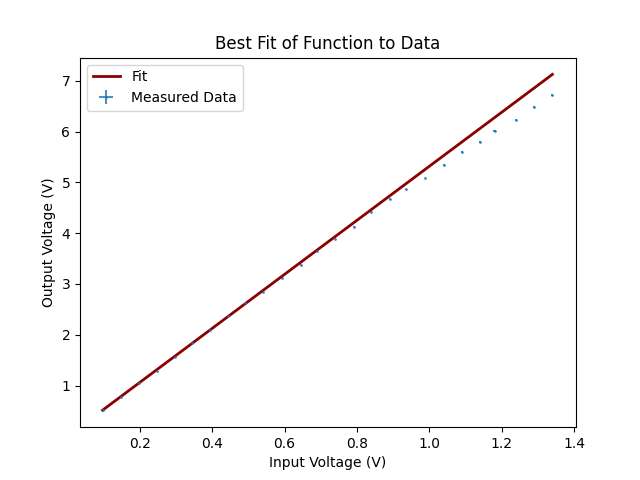

In [38]:
display(results_2.autofit_graph)

(Post-Lab) **Observations:** The model seems to match the data quite well (except for a deviating trend at higher input voltages), and we can be certain that the uncertainties are extremely underestimated.

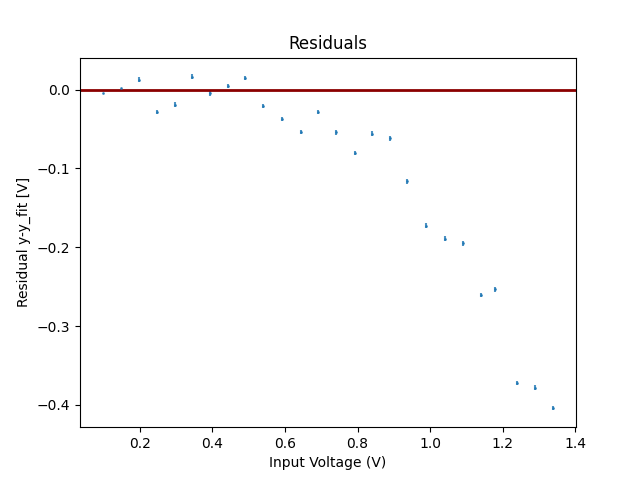

In [39]:
display(results_2.autofit_residuals_graph)

(Post-Lab) **Observations:** There is clearly a trend in the residuals, which implies that the model is not actually a perfect fit, but the calculated gain of $\beta \approx 5.3$ is still a fairly correct value over the majority of the points. The $\chi^2$ can undoubtedly be explained by the poor estimation of uncertainty (and some potential fixes for future labs has been provided previously).

Overall, in conclusion, the gain at 100 kHz matched the expectation of $\beta_f / \beta_g$, but by increasing the frequency by a factor of 5 to 500 kHz, the gain decreased by roughly a factor of 2 (to about 5.3). This is probably due to the effect seen previously of capacitors, as
$$|\hat{A}|(f) = \frac{A_0}{\sqrt{1 + (2\pi RC f)^2}}$$
so higher frequencies decrease the amplification roughly linearly, as
$$\lim_{f \to \infty} |\hat{A}|(f) = \lim_{f \to \infty} \frac{A_0}{f} = 0$$
- The range of allowed voltages due to clipping, as well, is not perfectly -5 volts to 5 volts (as seen). This is also non-ideal behavior due to the nature of the amplifier.

**End of Lab Checklist:**

- [X] Saved screenshots of the input and output signals with the Op-Amp power off and on
- [X] Description and screenshots of both distorted and undistorted amplified signals from section 4.2.1
- [X] A dataset of $V_{out}$ vs. $V_{in}$ at 100 Hz.
- [X] A dataset of $V_{out}$ vs. $V_{in}$ at a high frequency (e.g. 500 kHz)